### Imports

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb

In [41]:
df_all = pd.read_csv('matches.csv')
df_all

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,formation,opp formation,referee,sh,sot,dist,fk,pk,pkatt,team
0,0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3.0,1.0,...,4-2-3-1,5-3-2,Andre Marriner,13.0,8.0,21.1,2.0,1.0,1.0,Manchester City
1,1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2.0,5.0,...,4-2-3-1,5-4-1,Michael Oliver,16.0,5.0,19.8,1.0,0.0,0.0,Manchester City
2,2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1.0,1.0,...,4-3-3,4-1-4-1,Mike Dean,23.0,1.0,18.2,1.0,0.0,0.0,Manchester City
3,3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,...,3-1-4-2,4-3-3,Chris Kavanagh,13.0,5.0,17.7,0.0,0.0,0.0,Manchester City
4,4,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,...,4-3-3,5-4-1,Anthony Taylor,14.0,7.0,20.9,1.0,0.0,0.0,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,3854,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,...,4-2-3-1,4-1-4-1,John Brooks,9.0,3.0,21.6,0.0,0.0,0.0,Norwich City
3855,3855,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,...,4-2-3-1,4-2-3-1,Robert Jones,8.0,2.0,22.2,1.0,0.0,0.0,Norwich City
3856,3856,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,...,4-1-4-1,4-2-3-1,Simon Hooper,9.0,5.0,17.0,0.0,0.0,0.0,Norwich City
3857,3857,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,...,3-4-3,3-4-3,Tony Harrington,11.0,2.0,14.4,0.0,0.0,0.0,Norwich City


In [42]:
df_all = df_all.drop(['Unnamed: 0','opp formation'], axis=1)

In [43]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3859 entries, 0 to 3858
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3859 non-null   object 
 1   time       3859 non-null   object 
 2   comp       3859 non-null   object 
 3   round      3859 non-null   object 
 4   day        3859 non-null   object 
 5   venue      3859 non-null   object 
 6   result     3859 non-null   object 
 7   gf         3859 non-null   float64
 8   ga         3859 non-null   float64
 9   opponent   3859 non-null   object 
 10  xg         3859 non-null   float64
 11  xga        3859 non-null   float64
 12  poss       3859 non-null   float64
 13  formation  3859 non-null   object 
 14  referee    3859 non-null   object 
 15  sh         3859 non-null   float64
 16  sot        3859 non-null   float64
 17  dist       3857 non-null   float64
 18  fk         3859 non-null   float64
 19  pk         3859 non-null   float64
 20  pkatt   

In [45]:
df_all = df_all.dropna()

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3857 entries, 0 to 3858
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       3857 non-null   object 
 1   time       3857 non-null   object 
 2   comp       3857 non-null   object 
 3   round      3857 non-null   object 
 4   day        3857 non-null   object 
 5   venue      3857 non-null   object 
 6   result     3857 non-null   object 
 7   gf         3857 non-null   float64
 8   ga         3857 non-null   float64
 9   opponent   3857 non-null   object 
 10  xg         3857 non-null   float64
 11  xga        3857 non-null   float64
 12  poss       3857 non-null   float64
 13  formation  3857 non-null   object 
 14  referee    3857 non-null   object 
 15  sh         3857 non-null   float64
 16  sot        3857 non-null   float64
 17  dist       3857 non-null   float64
 18  fk         3857 non-null   float64
 19  pk         3857 non-null   float64
 20  pkatt      38

In [46]:
df_all['team'].value_counts()

team
Manchester United           224
Newcastle United            224
Manchester City             223
Arsenal                     223
Liverpool                   190
West Ham United             186
Brighton and Hove Albion    186
Burnley                     185
Tottenham Hotspur           185
Wolverhampton Wanderers     185
Chelsea                     184
Everton                     184
Aston Villa                 184
Crystal Palace              183
Southampton                 148
Leeds United                147
Leicester City              146
Fulham                      114
Sheffield United            114
Brentford                   110
West Bromwich Albion         76
Watford                      71
Norwich City                 71
Bournemouth                  38
Nottingham Forest            38
Luton Town                   38
Name: count, dtype: int64

In [47]:
df_all['round'].value_counts()

round
Matchweek 2     104
Matchweek 28    104
Matchweek 29    104
Matchweek 26    104
Matchweek 25    104
Matchweek 16    104
Matchweek 24    104
Matchweek 23    104
Matchweek 31    104
Matchweek 3     104
Matchweek 20    104
Matchweek 1     104
Matchweek 19    104
Matchweek 32    104
Matchweek 17    104
Matchweek 15    104
Matchweek 14    104
Matchweek 13    104
Matchweek 12    104
Matchweek 11    104
Matchweek 10    104
Matchweek 9     104
Matchweek 8     104
Matchweek 7     104
Matchweek 6     104
Matchweek 34    104
Matchweek 4     104
Matchweek 30    102
Matchweek 21    102
Matchweek 27    102
Matchweek 22    102
Matchweek 18    102
Matchweek 5     102
Matchweek 33     97
Matchweek 35     85
Matchweek 36     85
Matchweek 37     85
Matchweek 38     85
Name: count, dtype: int64

In [48]:
df_all.dtypes

date          object
time          object
comp          object
round         object
day           object
venue         object
result        object
gf           float64
ga           float64
opponent      object
xg           float64
xga          float64
poss         float64
formation     object
referee       object
sh           float64
sot          float64
dist         float64
fk           float64
pk           float64
pkatt        float64
team          object
dtype: object

In [50]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all.head(3)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,poss,formation,referee,sh,sot,dist,fk,pk,pkatt,team
0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3.0,1.0,Wolves,...,65.0,4-2-3-1,Andre Marriner,13.0,8.0,21.1,2.0,1.0,1.0,Manchester City
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2.0,5.0,Leicester City,...,72.0,4-2-3-1,Michael Oliver,16.0,5.0,19.8,1.0,0.0,0.0,Manchester City
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1.0,1.0,Leeds United,...,49.0,4-3-3,Mike Dean,23.0,1.0,18.2,1.0,0.0,0.0,Manchester City


In [52]:
df_all.dtypes

date         datetime64[ns]
time                 object
comp                 object
round                object
day                  object
venue                object
result               object
gf                  float64
ga                  float64
opponent             object
xg                  float64
xga                 float64
poss                float64
formation            object
referee              object
sh                  float64
sot                 float64
dist                float64
fk                  float64
pk                  float64
pkatt               float64
team                 object
dtype: object

In [53]:
df_all['venue_code'] = df_all['venue'].astype('category').cat.codes 
df_all.head(5) # 0 -> Away, 1 -> Home

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,formation,referee,sh,sot,dist,fk,pk,pkatt,team,venue_code
0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3.0,1.0,Wolves,...,4-2-3-1,Andre Marriner,13.0,8.0,21.1,2.0,1.0,1.0,Manchester City,0
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2.0,5.0,Leicester City,...,4-2-3-1,Michael Oliver,16.0,5.0,19.8,1.0,0.0,0.0,Manchester City,1
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1.0,1.0,Leeds United,...,4-3-3,Mike Dean,23.0,1.0,18.2,1.0,0.0,0.0,Manchester City,0
3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,3-1-4-2,Chris Kavanagh,13.0,5.0,17.7,0.0,0.0,0.0,Manchester City,1
4,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,4-3-3,Anthony Taylor,14.0,7.0,20.9,1.0,0.0,0.0,Manchester City,0


In [54]:
df_all['opp_code'] = df_all['opponent'].astype('category').cat.codes 

In [56]:
df_all['hour'] = df_all['time'].str.replace(":.+", "", regex=True).astype("int") # convert hour to integer

In [58]:
df_all['day_code'] = df_all['date'].dt.dayofweek

In [61]:
mapping_results = {'W':0,'L':1, 'D':2}
df_all['result'] = df_all['result'].map(mapping_results)

df_all

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,team,venue_code,opp_code,hour,day_code
0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,0,3.0,1.0,Wolves,...,8.0,21.1,2.0,1.0,1.0,Manchester City,0,25,20,0
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,1,2.0,5.0,Leicester City,...,5.0,19.8,1.0,0.0,0.0,Manchester City,1,11,16,6
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,2,1.0,1.0,Leeds United,...,1.0,18.2,1.0,0.0,0.0,Manchester City,0,10,17,5
3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,0,1.0,0.0,Arsenal,...,5.0,17.7,0.0,0.0,0.0,Manchester City,1,0,17,5
4,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,2,1.0,1.0,West Ham,...,7.0,20.9,1.0,0.0,0.0,Manchester City,0,24,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,1,0.0,2.0,Aston Villa,...,3.0,21.6,0.0,0.0,0.0,Norwich City,0,1,15,5
3855,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,1,0.0,4.0,West Ham,...,2.0,22.2,1.0,0.0,0.0,Norwich City,1,24,14,6
3856,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,1,0.0,3.0,Leicester City,...,5.0,17.0,0.0,0.0,0.0,Norwich City,0,11,19,2
3857,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,2,1.0,1.0,Wolves,...,2.0,14.4,0.0,0.0,0.0,Norwich City,0,25,14,6


In [59]:
df_all

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,team,venue_code,opp_code,hour,day_code
0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,W,3.0,1.0,Wolves,...,8.0,21.1,2.0,1.0,1.0,Manchester City,0,25,20,0
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,L,2.0,5.0,Leicester City,...,5.0,19.8,1.0,0.0,0.0,Manchester City,1,11,16,6
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,D,1.0,1.0,Leeds United,...,1.0,18.2,1.0,0.0,0.0,Manchester City,0,10,17,5
3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,...,5.0,17.7,0.0,0.0,0.0,Manchester City,1,0,17,5
4,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,...,7.0,20.9,1.0,0.0,0.0,Manchester City,0,24,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3854,2022-04-30,15:00,Premier League,Matchweek 35,Sat,Away,L,0.0,2.0,Aston Villa,...,3.0,21.6,0.0,0.0,0.0,Norwich City,0,1,15,5
3855,2022-05-08,14:00,Premier League,Matchweek 36,Sun,Home,L,0.0,4.0,West Ham,...,2.0,22.2,1.0,0.0,0.0,Norwich City,1,24,14,6
3856,2022-05-11,19:45,Premier League,Matchweek 21,Wed,Away,L,0.0,3.0,Leicester City,...,5.0,17.0,0.0,0.0,0.0,Norwich City,0,11,19,2
3857,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,D,1.0,1.0,Wolves,...,2.0,14.4,0.0,0.0,0.0,Norwich City,0,25,14,6


### Build Model

#### Baseline Model 

In [67]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=42)

Split Train-Test

In [79]:
# Almost 80-20 Split
train = df_all[df_all['date'] < '2023-05-01']
test = df_all[df_all['date'] > '2023-05-01']

In [82]:
predictors = ['venue_code', 'opp_code', 'hour','day_code']

In [84]:
rf.fit(train[predictors], train['result'])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=42)

In [85]:
preds = rf.predict(test[predictors])

Calculate Metrics

In [87]:
acc = accuracy_score(test['result'], preds)

acc

0.4409148665819568

In [89]:
combined = pd.DataFrame(dict(actual=test['result'],predictions=preds))

In [93]:
pd.crosstab(index=combined['actual'], columns=combined['predictions'])

predictions,0,1,2
actual,,,
0,161,115,37
1,101,167,36
2,76,75,19


In [101]:
precision_score(test['result'], preds, average='weighted') # Since our data not equally distributed, weighted could be a good choice for us

0.41474929420796763

Improve our metrics with more predictors

In [102]:
# Create one df for every squad in our data

grouped_matches = df_all.groupby('team')

In [103]:
group = grouped_matches.get_group('Manchester City')

In [104]:
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,team,venue_code,opp_code,hour,day_code
0,2020-09-21,20:15,Premier League,Matchweek 2,Mon,Away,0,3.0,1.0,Wolves,...,8.0,21.1,2.0,1.0,1.0,Manchester City,0,25,20,0
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,1,2.0,5.0,Leicester City,...,5.0,19.8,1.0,0.0,0.0,Manchester City,1,11,16,6
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,2,1.0,1.0,Leeds United,...,1.0,18.2,1.0,0.0,0.0,Manchester City,0,10,17,5
3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,0,1.0,0.0,Arsenal,...,5.0,17.7,0.0,0.0,0.0,Manchester City,1,0,17,5
4,2020-10-24,12:30,Premier League,Matchweek 6,Sat,Away,2,1.0,1.0,West Ham,...,7.0,20.9,1.0,0.0,0.0,Manchester City,0,24,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,2022-04-30,17:30,Premier League,Matchweek 35,Sat,Away,0,4.0,0.0,Leeds United,...,6.0,16.2,0.0,0.0,0.0,Manchester City,0,10,17,5
3133,2022-05-08,16:30,Premier League,Matchweek 36,Sun,Home,0,5.0,0.0,Newcastle Utd,...,9.0,16.0,1.0,0.0,0.0,Manchester City,1,16,16,6
3134,2022-05-11,20:15,Premier League,Matchweek 33,Wed,Away,0,5.0,1.0,Wolves,...,5.0,14.7,0.0,0.0,0.0,Manchester City,0,25,20,2
3135,2022-05-15,14:00,Premier League,Matchweek 37,Sun,Away,2,2.0,2.0,West Ham,...,7.0,18.6,2.0,0.0,1.0,Manchester City,0,24,14,6


In [105]:
# funtion for rolling averages pre 3 week
def rolling_averages(group, cols, new_cols):
    group =group.sort_values('date')
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

In [106]:
# cols for we want rolling averages
cols = ['gf','ga','sh','sot','dist','fk','pk','pkatt']

new_cols = [f"{c}_rolling" for c in cols]

In [107]:
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [108]:
# Call rolling averages for man city
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
1,2020-09-27,16:30,Premier League,Matchweek 3,Sun,Home,1,2.0,5.0,Leicester City,...,16,6,2.666667,2.333333,14.000000,7.000000,20.066667,1.666667,0.666667,0.666667
2,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,2,1.0,1.0,Leeds United,...,17,5,2.333333,3.666667,15.000000,6.000000,19.633333,1.333333,0.333333,0.333333
1391,2020-10-03,17:30,Premier League,Matchweek 4,Sat,Away,2,1.0,1.0,Leeds United,...,17,5,1.666667,3.666667,18.333333,3.666667,18.933333,1.000000,0.000000,0.000000
3,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,0,1.0,0.0,Arsenal,...,17,5,1.333333,2.333333,20.666667,2.333333,18.533333,1.000000,0.000000,0.000000
1392,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Home,0,1.0,0.0,Arsenal,...,17,5,1.000000,0.666667,19.666667,2.333333,17.833333,0.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,2024-04-28,16:30,Premier League,Matchweek 35,Sun,Away,0,2.0,0.0,Nott'ham Forest,...,16,6,4.333333,1.000000,22.666667,8.666667,16.666667,0.333333,0.333333,0.333333
2183,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Home,0,5.0,1.0,Wolves,...,17,5,3.666667,0.333333,20.333333,7.666667,17.533333,0.666667,0.333333,0.333333
2184,2024-05-11,12:30,Premier League,Matchweek 37,Sat,Away,0,4.0,0.0,Fulham,...,12,5,3.666667,0.333333,14.333333,7.000000,17.000000,0.666667,0.666667,0.666667
2185,2024-05-14,20:00,Premier League,Matchweek 34,Tue,Away,0,2.0,0.0,Tottenham,...,20,1,3.666667,0.333333,14.666667,7.666667,17.200000,0.333333,1.000000,1.000000


In [109]:
# Apply for all mathes
matches_rolling = df_all.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))

/var/folders/0v/n3w11jxs0zxdx0ty34xv_fx40000gn/T/ipykernel_61338/2245878681.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = df_all.groupby('team').apply(lambda x: rolling_averages(x, cols, new_cols))


In [110]:
matches_rolling

date   time            comp         round  \
team                                                                           
Arsenal                 267  2020-09-19  20:00  Premier League   Matchweek 2   
                        268  2020-09-28  20:00  Premier League   Matchweek 3   
                        1657 2020-09-28  20:00  Premier League   Matchweek 3   
                        269  2020-10-04  14:00  Premier League   Matchweek 4   
                        1658 2020-10-04  14:00  Premier League   Matchweek 4   
...                                 ...    ...             ...           ...   
Wolverhampton Wanderers 2676 2024-04-24  19:45  Premier League  Matchweek 29   
                        2677 2024-04-27  15:00  Premier League  Matchweek 35   
                        2678 2024-05-04  17:30  Premier League  Matchweek 36   
                        2679 2024-05-11  15:00  Premier League  Matchweek 37   
                        2680 2024-05-19  16:00  Premier League  Matchweek 38   

                              day venue  result   gf   ga         opponent  \
team                                                                         
Arsenal                 267   Sat  Home       0  2.0  1.0         West Ham   
                        268   Mon  Away       1  1.0  3.0        Liverpool   
                        1657  Mon  Away       1  1.0  3.0        Liverpool   
                        269   Sun  Home       0  2.0  1.0    Sheffield Utd   
                        1658  Sun  Home       0  2.0  1.0    Sheffield Utd   
...                           ...   ...     ...  ...  ...              ...   
Wolverhampton Wanderers 2676  Wed  Home       1  0.0  1.0      Bournemouth   
                        2677  Sat  Home       0  2.0  1.0       Luton Town   
                        2678  Sat  Away       1  1.0  5.0  Manchester City   
                        2679  Sat  Home       1  1.0  3.0   Crystal Palace   
                        2680  Sun  Away       1  0.0  2.0        Liverpool   

                              ...  hour  day_code  gf_rolling ga_rolling  \
team                          ...                                          
Arsenal                 267   ...    20         5    2.666667   0.333333   
                        268   ...    20         0    2.333333   0.666667   
                        1657  ...    20         0    1.666667   1.666667   
                        269   ...    14         6    1.333333   2.333333   
                        1658  ...    14         6    1.333333   2.333333   
...                           ...   ...       ...         ...        ...   
Wolverhampton Wanderers 2676  ...    19         2    1.000000   2.000000   
                        2677  ...    15         5    0.666667   1.666667   
                        2678  ...    17         5    0.666667   1.333333   
                        2679  ...    15         5    1.000000   2.333333   
                        2680  ...    16         6    1.333333   3.000000   

                             sh_rolling  sot_rolling  dist_rolling  \
team                                                                 
Arsenal                 267   10.666667     4.333333     14.333333   
                        268    8.666667     3.666667     14.566667   
                        1657   5.666667     3.000000     15.033333   
                        269    5.000000     3.000000     15.033333   
                        1658   4.666667     3.666667     15.533333   
...                                 ...          ...           ...   
Wolverhampton Wanderers 2676   9.666667     4.000000     20.533333   
                        2677  10.333333     3.333333     18.766667   
                        2678  11.000000     4.000000     19.666667   
                        2679  10.000000     3.333333     15.966667   
                        2680   9.666667     4.666667     14.133333   

                              fk_rolling  pk_rolling  pkatt_rolling  
team     

In [111]:
# Drop team index
matches_rolling = matches_rolling.droplevel('team')
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
267,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,0,2.0,1.0,West Ham,...,20,5,2.666667,0.333333,10.666667,4.333333,14.333333,1.333333,0.000000,0.000000
268,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,1,1.0,3.0,Liverpool,...,20,0,2.333333,0.666667,8.666667,3.666667,14.566667,0.666667,0.000000,0.000000
1657,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,1,1.0,3.0,Liverpool,...,20,0,1.666667,1.666667,5.666667,3.000000,15.033333,0.000000,0.000000,0.000000
269,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,0,2.0,1.0,Sheffield Utd,...,14,6,1.333333,2.333333,5.000000,3.000000,15.033333,0.000000,0.000000,0.000000
1658,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,0,2.0,1.0,Sheffield Utd,...,14,6,1.333333,2.333333,4.666667,3.666667,15.533333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676,2024-04-24,19:45,Premier League,Matchweek 29,Wed,Home,1,0.0,1.0,Bournemouth,...,19,2,1.000000,2.000000,9.666667,4.000000,20.533333,0.333333,0.333333,0.333333
2677,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,0,2.0,1.0,Luton Town,...,15,5,0.666667,1.666667,10.333333,3.333333,18.766667,0.000000,0.000000,0.000000
2678,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Away,1,1.0,5.0,Manchester City,...,17,5,0.666667,1.333333,11.000000,4.000000,19.666667,0.000000,0.000000,0.000000
2679,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,1,1.0,3.0,Crystal Palace,...,15,5,1.000000,2.333333,10.000000,3.333333,15.966667,0.000000,0.000000,0.000000


In [112]:
# Adjust index from 0 - 3778

matches_rolling.index = range(matches_rolling.shape[0])
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,0,2.0,1.0,West Ham,...,20,5,2.666667,0.333333,10.666667,4.333333,14.333333,1.333333,0.000000,0.000000
1,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,1,1.0,3.0,Liverpool,...,20,0,2.333333,0.666667,8.666667,3.666667,14.566667,0.666667,0.000000,0.000000
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,1,1.0,3.0,Liverpool,...,20,0,1.666667,1.666667,5.666667,3.000000,15.033333,0.000000,0.000000,0.000000
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,0,2.0,1.0,Sheffield Utd,...,14,6,1.333333,2.333333,5.000000,3.000000,15.033333,0.000000,0.000000,0.000000
4,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,0,2.0,1.0,Sheffield Utd,...,14,6,1.333333,2.333333,4.666667,3.666667,15.533333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,2024-04-24,19:45,Premier League,Matchweek 29,Wed,Home,1,0.0,1.0,Bournemouth,...,19,2,1.000000,2.000000,9.666667,4.000000,20.533333,0.333333,0.333333,0.333333
3775,2024-04-27,15:00,Premier League,Matchweek 35,Sat,Home,0,2.0,1.0,Luton Town,...,15,5,0.666667,1.666667,10.333333,3.333333,18.766667,0.000000,0.000000,0.000000
3776,2024-05-04,17:30,Premier League,Matchweek 36,Sat,Away,1,1.0,5.0,Manchester City,...,17,5,0.666667,1.333333,11.000000,4.000000,19.666667,0.000000,0.000000,0.000000
3777,2024-05-11,15:00,Premier League,Matchweek 37,Sat,Home,1,1.0,3.0,Crystal Palace,...,15,5,1.000000,2.333333,10.000000,3.333333,15.966667,0.000000,0.000000,0.000000


In [128]:
# Create funtion to make predictions

def make_predictions(data, predictors):
    """
    Each time we can run model at once from here
    """
    train = data[data['date'] < '2023-05-01']
    test = data[data['date'] > '2023-05-01']
    rf.fit(train[predictors], train['result'])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test['result'],predictions=preds), index=test.index)
    precision = precision_score(test['result'],preds, average='weighted')
    return combined, precision
    

In [129]:
combined, precision = make_predictions(matches_rolling, predictors + new_cols)

In [130]:
precision

0.459555526055323

In [131]:
combined

,actual,predictions
177,0,1
178,0,1
179,1,0
180,1,0
181,0,0
...,...,...
3774,1,0
3775,0,1
3776,1,1
3777,1,1


Add More Features

In [152]:
train = matches_rolling[matches_rolling['date'] < '2023-05-01']
test = matches_rolling[matches_rolling['date'] > '2023-05-01']

In [138]:
matches_rolling['ref_code'] = matches_rolling['referee'].astype('category').cat.codes 

In [140]:
predictors_new = ['venue_code', 'opp_code', 'hour', 'day_code','xg','xga','gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
       'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling','ref_code']

In [142]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=42)

In [153]:
rf.fit(train[predictors_new], train['result'])
preds = rf.predict(test[predictors_new])
precision_score(test['result'], preds, average='weighted')


0.5291579482274167

In [154]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 
 4]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='precision_weighted') 

# Fit the GridSearchCV object to the training data
grid_search.fit(train[predictors_new], train['result'])

# Access the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Use the best model for predictions on the test set
preds = best_model.predict(test[predictors_new])

# Evaluate precision score
precision = precision_score(test['result'], preds, average='weighted')

print(f"Weighted Precision Score with Grid Search: {precision}")

/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_div

Weighted Precision Score with Grid Search: 0.45996067084045705


/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [157]:
precision

0.45996067084045705

In [155]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


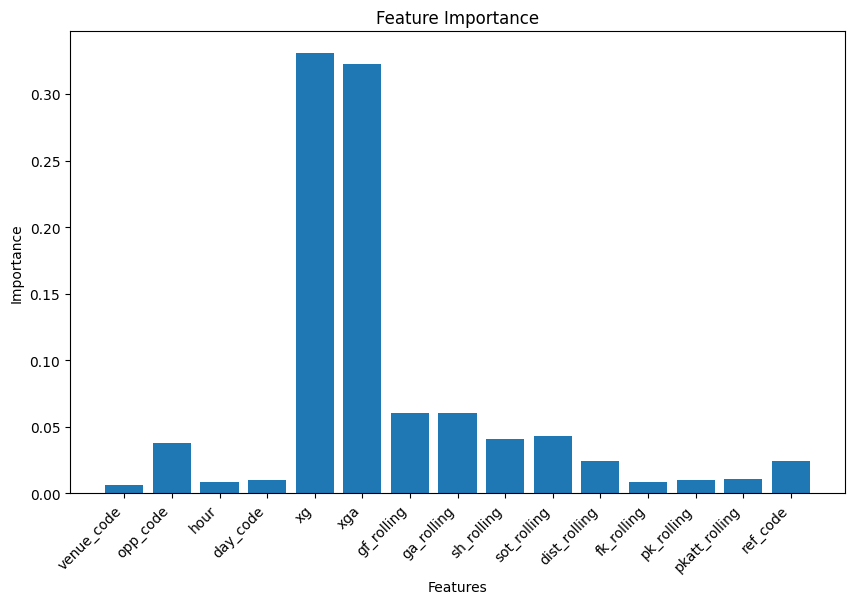

In [156]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(predictors_new, feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [161]:
important_features = ['opp_code', 'xg', 'xga','gf_rolling','ga_rolling','sh_rolling','sot_rolling','dist_rolling','ref_code']

In [162]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 
 4]
}

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='precision_weighted') 

# Fit the GridSearchCV object to the training data
grid_search.fit(train[important_features], train['result'])

# Access the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Use the best model for predictions on the test set
preds = best_model.predict(test[important_features])

# Evaluate precision score
precision = precision_score(test['result'], preds, average='weighted')

print(f"Weighted Precision Score with Grid Search: {precision}")

Weighted Precision Score with Grid Search: 0.5746353169611115


In [163]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


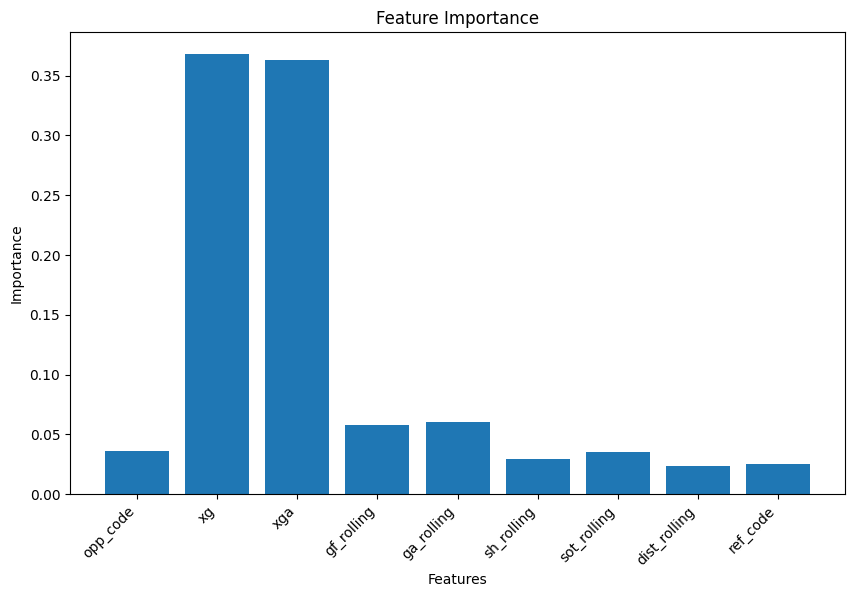

In [165]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(important_features, feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [184]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Define the parameter grid for tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'gamma': np.linspace(0, 5, 5),
    'min_child_weight': np.arange(1, 6, 1)
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='precision_weighted', 
                                   random_state=42, n_jobs=-1, verbose=2)

# Fit the model to the training data
random_search.fit(train[predictors_new], train['result'])

# Access the best model with tuned hyperparameters
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set
preds = best_xgb_model.predict(test[predictors_new])

# Evaluate precision score
precision = precision_score(test['result'], preds, average='weighted')

print(f"Weighted Precision Score with XGBoost and RandomizedSearch: {precision}")



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.9s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.9s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.9s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.9s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.9s
[CV] END colsample_bytree=1.0, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=100, s

/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=1.0, gamma=5.0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.625; total time=   0.7s
[CV] END colsample_bytree=1.0, gamma=5.0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.625; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=1.25, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.75; total time=   0.6s
[CV] END colsample_bytree=0.75, gamma=2.5, learning_rate=0.1388888888888889, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.875; total time=   1.2s
[CV] END colsample_bytree=0.75, gamma=2.5, learning_rate=0.1388888888888889, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.875; total time=   1.2s
[CV] END colsample_bytree=0.875, gamma=1.25, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.75; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=1

/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=0.625, gamma=5.0, learning_rate=0.07444444444444444, max_depth=7, min_child_weight=2, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=4, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_byt

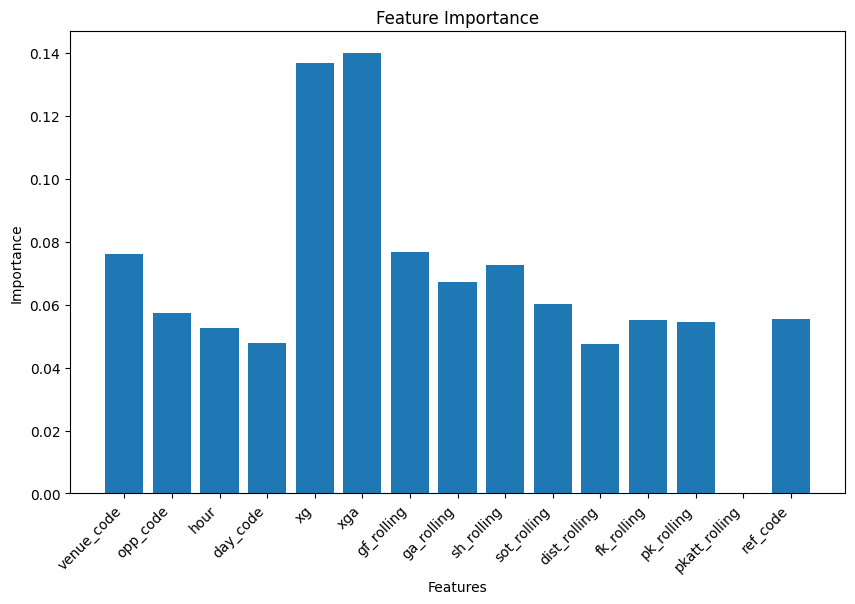

In [186]:
# Feature importance
feature_importances = best_xgb_model.feature_importances_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(predictors_new, feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [187]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

predictors_new = ['venue_code', 'opp_code','xg','xga','gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling',
       'dist_rolling', 'fk_rolling','ref_code']

# Define the parameter grid for tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'gamma': np.linspace(0, 5, 5),
    'min_child_weight': np.arange(1, 6, 1)
}

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='precision_weighted', 
                                   random_state=42, n_jobs=-1, verbose=2)

# Fit the model to the training data
random_search.fit(train[predictors_new], train['result'])

# Access the best model with tuned hyperparameters
best_xgb_model = random_search.best_estimator_

# Make predictions on the test set
preds = best_xgb_model.predict(test[predictors_new])

# Evaluate precision score
precision = precision_score(test['result'], preds, average='weighted')

print(f"Weighted Precision Score with XGBoost and RandomizedSearch: {precision}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.7s
[CV] END colsample_bytree=0.875, gamma=2.5, learning_rate=0.1388888888888889, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.875; total time=   0.8s
[CV] END colsample_bytree=1.0, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=4, n_estimators=100, s

/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=1.0, gamma=5.0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.625; total time=   0.6s
[CV] END colsample_bytree=1.0, gamma=5.0, learning_rate=0.01, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.625; total time=   0.6s
[CV] END colsample_bytree=0.875, gamma=1.25, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.75; total time=   0.5s
[CV] END colsample_bytree=0.75, gamma=2.5, learning_rate=0.1388888888888889, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.875; total time=   1.0s
[CV] END colsample_bytree=0.875, gamma=1.25, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=2, n_estimators=100, subsample=0.75; total time=   0.6s
[CV] END colsample_bytree=0.75, gamma=2.5, learning_rate=0.1388888888888889, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.875; total time=   1.0s
[CV] END colsample_bytree=0.875, gamma=1

/Users/burakbedir/Desktop/B/Projects/Predict-Football-Match/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END colsample_bytree=0.625, gamma=5.0, learning_rate=0.07444444444444444, max_depth=7, min_child_weight=2, n_estimators=50, subsample=0.5; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=4, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.8s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.042222222222222223, max_depth=3, min_child_weight=4, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=0.625, gamma=0.0, learning_rate=0.2677777777777778, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   1.9s
[CV] END colsample_byt